# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data


In [2]:
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
df = pd.read_csv(url)
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


# Data Cleaning


## Handling missing values
We can check for null values using .isnull() and fill them in using .fillna()
## Dropping unnecessary columns
 Use .drop() in pandas.

In [3]:
df = df.drop(columns=["Name"])
print(df)
print(df.isnull().sum())

     Survived  Pclass     Sex   Age  Siblings/Spouses Aboard  \
0           0       3    male  22.0                        1   
1           1       1  female  38.0                        1   
2           1       3  female  26.0                        0   
3           1       1  female  35.0                        1   
4           0       3    male  35.0                        0   
..        ...     ...     ...   ...                      ...   
882         0       2    male  27.0                        0   
883         1       1  female  19.0                        0   
884         0       3  female   7.0                        1   
885         1       1    male  26.0                        0   
886         0       3    male  32.0                        0   

     Parents/Children Aboard     Fare  
0                          0   7.2500  
1                          0  71.2833  
2                          0   7.9250  
3                          0  53.1000  
4                          0   

## Removing duplicates
We can use .drop_duplicates()

In [4]:
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())

70
0


## Quick View for the the data
We can use .describe() and .info()

In [5]:
print(df.describe())
print("=======================================")
print(df.info())

         Survived     Pclass         Age  Siblings/Spouses Aboard  \
count  817.000000  817.00000  817.000000               817.000000   
mean     0.403917    2.27295   29.694517                 0.564259   
std      0.490982    0.84897   14.482049                 1.139141   
min      0.000000    1.00000    0.420000                 0.000000   
25%      0.000000    1.00000   20.000000                 0.000000   
50%      0.000000    3.00000   28.000000                 0.000000   
75%      1.000000    3.00000   39.000000                 1.000000   
max      1.000000    3.00000   80.000000                 8.000000   

       Parents/Children Aboard        Fare  
count               817.000000  817.000000  
mean                  0.414933   34.059287  
std                   0.833092   51.390067  
min                   0.000000    0.000000  
25%                   0.000000    7.925000  
50%                   0.000000   15.741700  
75%                   1.000000   33.000000  
max               

## Converting data types
Using .astype()

In [6]:
df['Age'] =df['Age'].astype(np.int64)
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22,1,0,7.2500
1,1,1,female,38,1,0,71.2833
2,1,3,female,26,0,0,7.9250
3,1,1,female,35,1,0,53.1000
4,0,3,male,35,0,0,8.0500
...,...,...,...,...,...,...,...
881,0,3,female,39,0,5,29.1250
883,1,1,female,19,0,0,30.0000
884,0,3,female,7,1,2,23.4500
885,1,1,male,26,0,0,30.0000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 886
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 817 non-null    int64  
 1   Pclass                   817 non-null    int64  
 2   Sex                      817 non-null    object 
 3   Age                      817 non-null    int64  
 4   Siblings/Spouses Aboard  817 non-null    int64  
 5   Parents/Children Aboard  817 non-null    int64  
 6   Fare                     817 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 51.1+ KB


## Check for outliers
You can use box plots, histograms, and z-scores to find outliers.

###check for Age outlairs

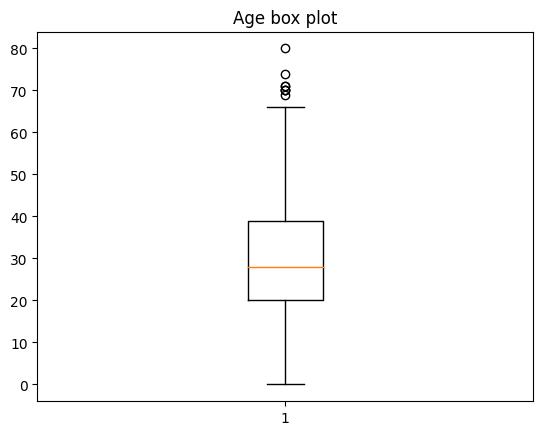

In [9]:
plt.boxplot(df['Age'])
plt.title('Age box plot')
plt.show()

###cheking for Fare outliars

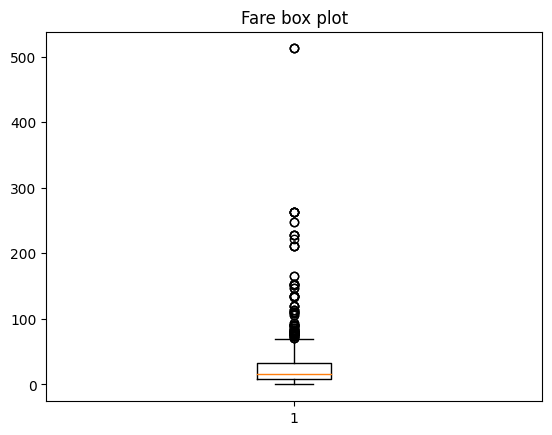

In [13]:
plt.boxplot(df['Fare'])
plt.title('Fare box plot')
plt.show()

###cheaking for outlairs in Siblings/Spouses Aboard

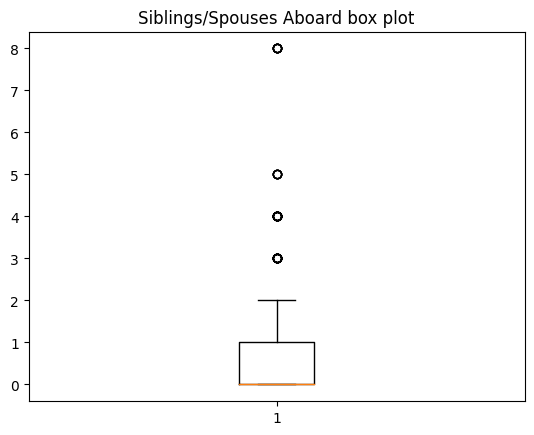

In [14]:
plt.boxplot(df['Siblings/Spouses Aboard'])
plt.title('Siblings/Spouses Aboard box plot')
plt.show()

###cheaking for outlairs in Parents/Children Aboard

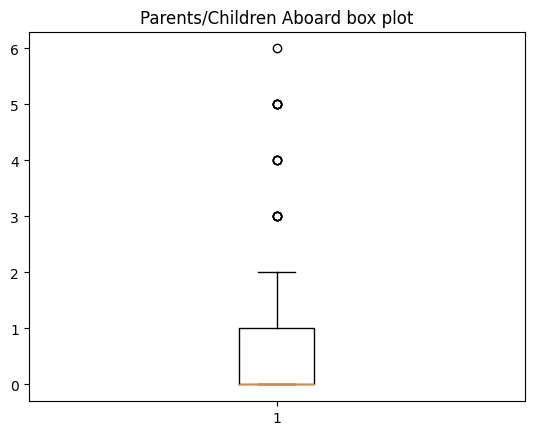

In [15]:
plt.boxplot(df['Parents/Children Aboard'])
plt.title('Parents/Children Aboard box plot')
plt.show()

###removing Age outlairs using IQR methode

In [16]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[ (df['Age'] >= lower_bound) & (df['Age'] <= upper_bound) ]
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22,1,0,7.2500
1,1,1,female,38,1,0,71.2833
2,1,3,female,26,0,0,7.9250
3,1,1,female,35,1,0,53.1000
4,0,3,male,35,0,0,8.0500
...,...,...,...,...,...,...,...
881,0,3,female,39,0,5,29.1250
883,1,1,female,19,0,0,30.0000
884,0,3,female,7,1,2,23.4500
885,1,1,male,26,0,0,30.0000


###Removing the Fare outlairs with IQR methode

In [17]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[ (df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound) ]
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22,1,0,7.2500
2,1,3,female,26,0,0,7.9250
3,1,1,female,35,1,0,53.1000
4,0,3,male,35,0,0,8.0500
5,0,3,male,27,0,0,8.4583
...,...,...,...,...,...,...,...
881,0,3,female,39,0,5,29.1250
883,1,1,female,19,0,0,30.0000
884,0,3,female,7,1,2,23.4500
885,1,1,male,26,0,0,30.0000


###Removing the Siblings/Spouses Aboard outlairs using the IQR methode

In [18]:
Q1 = df['Siblings/Spouses Aboard'].quantile(0.25)
Q3 = df['Siblings/Spouses Aboard'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[ (df['Siblings/Spouses Aboard'] >= lower_bound) & (df['Siblings/Spouses Aboard'] <= upper_bound) ]
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22,1,0,7.2500
2,1,3,female,26,0,0,7.9250
3,1,1,female,35,1,0,53.1000
4,0,3,male,35,0,0,8.0500
5,0,3,male,27,0,0,8.4583
...,...,...,...,...,...,...,...
881,0,3,female,39,0,5,29.1250
883,1,1,female,19,0,0,30.0000
884,0,3,female,7,1,2,23.4500
885,1,1,male,26,0,0,30.0000


###Removing outlairs in Parents/Children Aboard using IQR methode

In [19]:
Q1 = df['Parents/Children Aboard'].quantile(0.25)
Q3 = df['Parents/Children Aboard'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[ (df['Parents/Children Aboard'] >= lower_bound) & (df['Parents/Children Aboard'] <= upper_bound) ]
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22,1,0,7.2500
2,1,3,female,26,0,0,7.9250
3,1,1,female,35,1,0,53.1000
4,0,3,male,35,0,0,8.0500
5,0,3,male,27,0,0,8.4583
...,...,...,...,...,...,...,...
878,0,3,female,22,0,0,10.5167
879,0,2,male,28,0,0,10.5000
883,1,1,female,19,0,0,30.0000
885,1,1,male,26,0,0,30.0000


##  Correct data types
Ensure all columns have the correct data type (string, integer, float, boolean, etc.). You may need to convert some columns using .astype()

In [20]:
print(df.describe())
print("=================================")
print(df.info())

         Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  531.000000  531.000000  531.000000               531.000000   
mean     0.320151    2.425612   31.225989                 0.214689   
std      0.466974    0.781643   11.825211                 0.458721   
min      0.000000    1.000000    5.000000                 0.000000   
25%      0.000000    2.000000   22.000000                 0.000000   
50%      0.000000    3.000000   29.000000                 0.000000   
75%      1.000000    3.000000   38.000000                 0.000000   
max      1.000000    3.000000   66.000000                 2.000000   

       Parents/Children Aboard        Fare  
count                    531.0  531.000000  
mean                       0.0   16.028805  
std                        0.0   13.424254  
min                        0.0    0.000000  
25%                        0.0    7.775000  
50%                        0.0    9.500000  
75%                        0.0   21.339600  
max      

## Fix inconsistent data
Look for inconsistencies in the data, like spelling variations, different

In [21]:
print(df["Survived"].unique())
print(df["Pclass"].unique())
print(df["Sex"].unique())

[0 1]
[3 1 2]
['male' 'female']


# Data Preprocessing


## Renaming columns
Using .rename()

In [22]:
df = df.rename(columns={"Survived":"has_survived","Pclass":"passenger class","Siblings/Spouses Aboard":"number of Siblings/Spouses Aboard","Parents/Children Aboard":"number of Parents/Children Aboard","Fare":"travel Fare"})
df

,has_survived,passenger class,Sex,Age,number of Siblings/Spouses Aboard,number of Parents/Children Aboard,travel Fare
0,0,3,male,22,1,0,7.2500
2,1,3,female,26,0,0,7.9250
3,1,1,female,35,1,0,53.1000
4,0,3,male,35,0,0,8.0500
5,0,3,male,27,0,0,8.4583
...,...,...,...,...,...,...,...
878,0,3,female,22,0,0,10.5167
879,0,2,male,28,0,0,10.5000
883,1,1,female,19,0,0,30.0000
885,1,1,male,26,0,0,30.0000


## Changing column order
Using .reindex()


In [23]:
columns = list(df.columns)
result_column = columns.pop(0)
columns.append(result_column)
df = df.reindex(columns,axis="columns")
df

,passenger class,Sex,Age,number of Siblings/Spouses Aboard,number of Parents/Children Aboard,travel Fare,has_survived
0,3,male,22,1,0,7.2500,0
2,3,female,26,0,0,7.9250,1
3,1,female,35,1,0,53.1000,1
4,3,male,35,0,0,8.0500,0
5,3,male,27,0,0,8.4583,0
...,...,...,...,...,...,...,...
878,3,female,22,0,0,10.5167,0
879,2,male,28,0,0,10.5000,0
883,1,female,19,0,0,30.0000,1
885,1,male,26,0,0,30.0000,1


## Encoding categorical variables


In [24]:
# df.info()
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df

,passenger class,Sex,Age,number of Siblings/Spouses Aboard,number of Parents/Children Aboard,travel Fare,has_survived
0,3,1,22,1,0,7.2500,0
2,3,0,26,0,0,7.9250,1
3,1,0,35,1,0,53.1000,1
4,3,1,35,0,0,8.0500,0
5,3,1,27,0,0,8.4583,0
...,...,...,...,...,...,...,...
878,3,0,22,0,0,10.5167,0
879,2,1,28,0,0,10.5000,0
883,1,0,19,0,0,30.0000,1
885,1,1,26,0,0,30.0000,1


#removing redundant columns

In [25]:
df['number of Parents/Children Aboard'].unique()

array([0])

In [26]:
df = df.drop('number of Parents/Children Aboard',axis=1)
df

,passenger class,Sex,Age,number of Siblings/Spouses Aboard,travel Fare,has_survived
0,3,1,22,1,7.2500,0
2,3,0,26,0,7.9250,1
3,1,0,35,1,53.1000,1
4,3,1,35,0,8.0500,0
5,3,1,27,0,8.4583,0
...,...,...,...,...,...,...
878,3,0,22,0,10.5167,0
879,2,1,28,0,10.5000,0
883,1,0,19,0,30.0000,1
885,1,1,26,0,30.0000,1


# Data Visualization


##Histograms
Use .hist() in pandas to get a visual representation of the distribution of a numeric variable. This can reveal outliers, skewness, and other patterns.

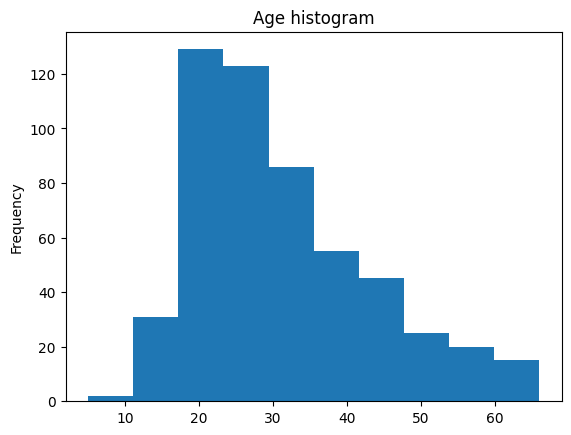

In [27]:
# print(df["Pclass"].unique())
# print(df["Sex"].unique())
df['Age'].plot.hist()
plt.title("Age histogram")
plt.show()

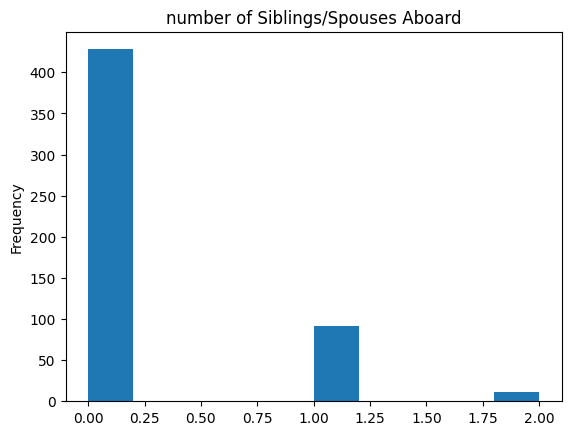

In [30]:
df['number of Siblings/Spouses Aboard'].plot.hist()
plt.title("number of Siblings/Spouses Aboard")
plt.show()

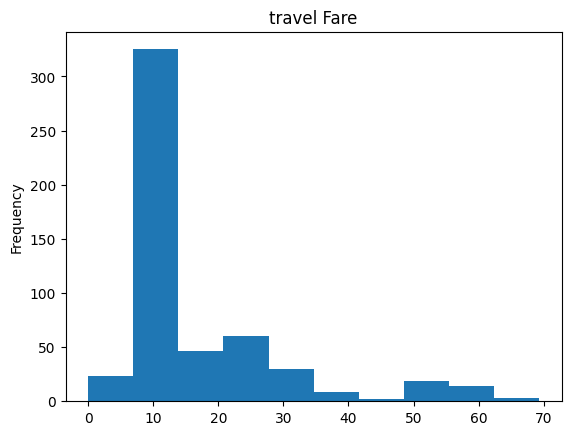

In [31]:
df['travel Fare'].plot.hist()
plt.title("travel Fare")
plt.show()

## Scatter plots
Use .plot(kind=’scatter’) to visualize the relationship between two numeric variables. This can reveal correlations, clusters, and outliers.

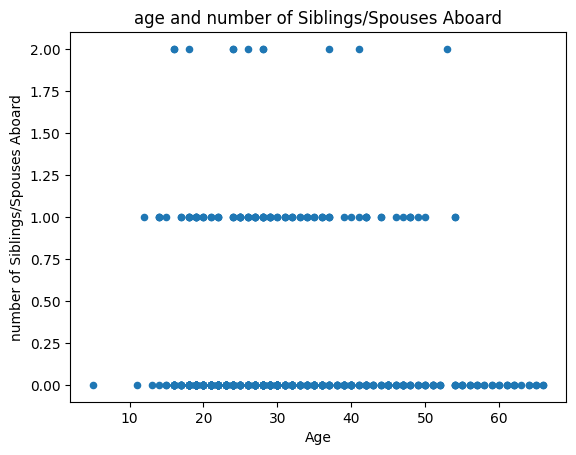

In [32]:
df.plot.scatter(x='Age', y="number of Siblings/Spouses Aboard")
plt.title("age and number of Siblings/Spouses Aboard")
plt.show()

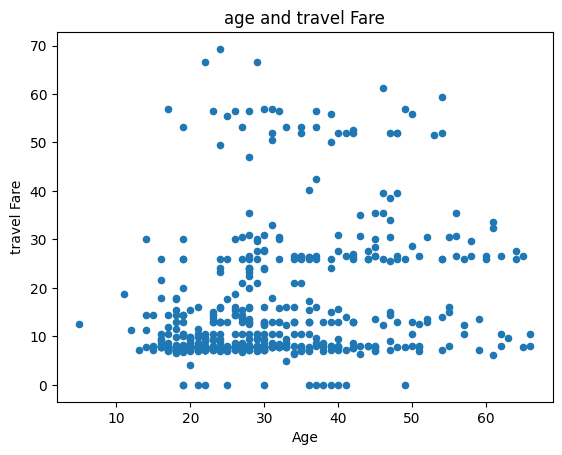

In [33]:
df.plot.scatter(x='Age', y="travel Fare")
plt.title("age and travel Fare")
plt.show()

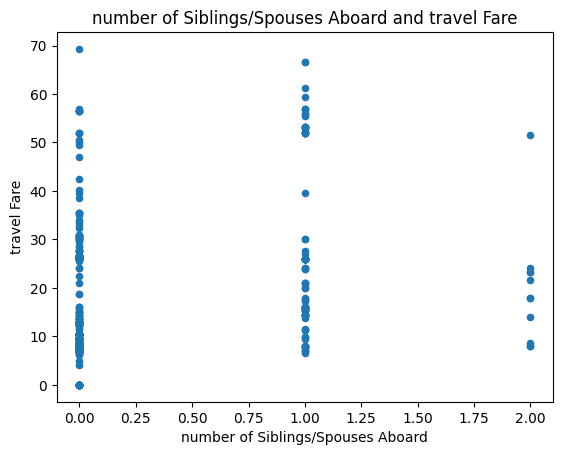

In [34]:
df.plot.scatter(x='number of Siblings/Spouses Aboard', y="travel Fare")
plt.title("number of Siblings/Spouses Aboard and travel Fare")
plt.show()

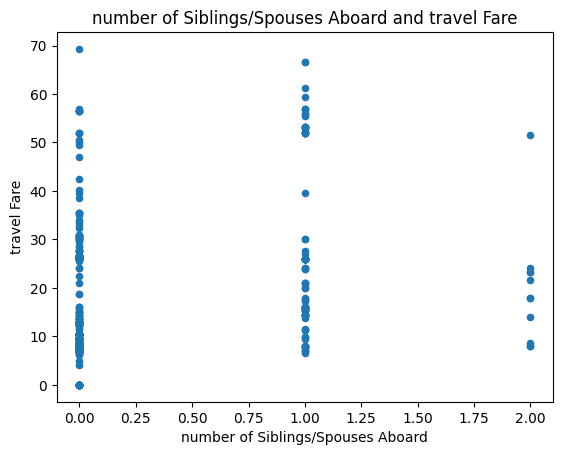

In [35]:
df.plot.scatter(x='number of Siblings/Spouses Aboard', y="travel Fare")
plt.title("number of Siblings/Spouses Aboard and travel Fare")
plt.show()

## Bar plots
Use .plot(kind=’bar’) to compare categorical variables or the counts of categorical variables. This gives a quick visual summary.

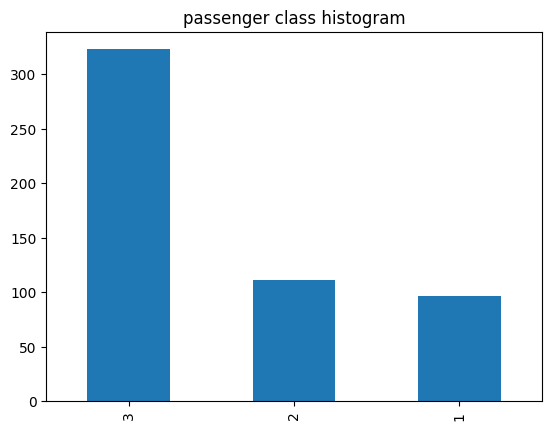

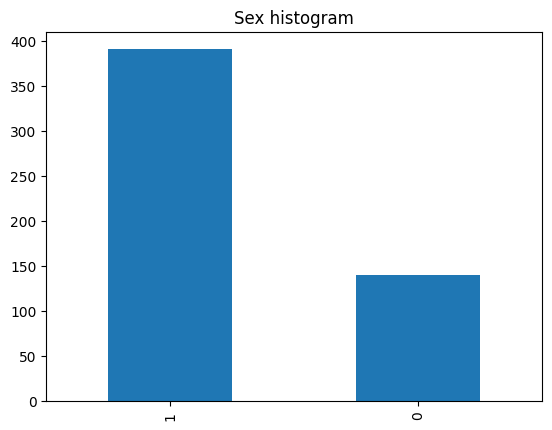

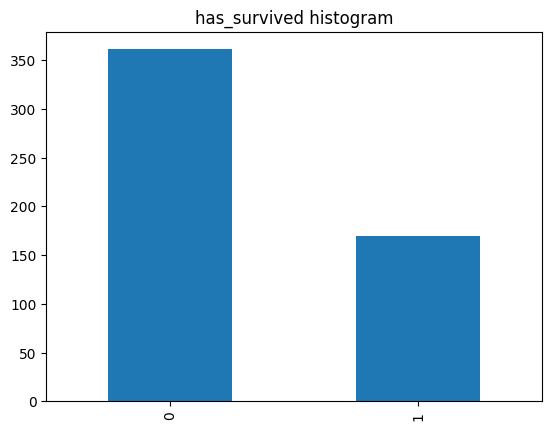

In [40]:
columns = ["passenger class",	"Sex",	"has_survived"]

for column in columns:
  df[column].value_counts().plot(kind="bar")
  plt.title(f"{column} histogram")
  plt.show()

## Correlation heatmaps
Use a seaborn heatmap() to visualize the correlation between all numeric variables.

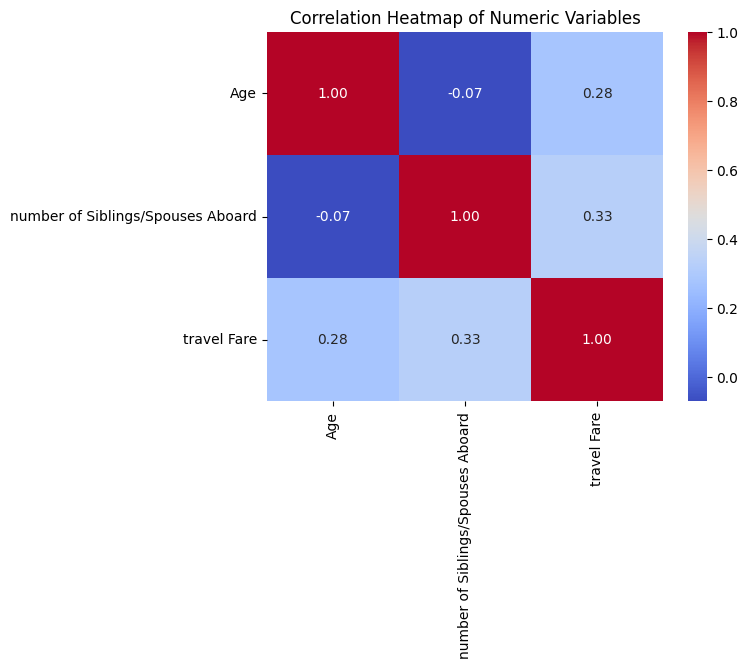

In [42]:
correlation_matrix = df.loc[:, 'Age':'travel Fare'].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()